In [110]:
import yt
import matplotlib.pyplot  as plt
import numpy as np

In [111]:
def get_yt_data_2d(filename):

    k_idx = 0
    fields_list = ["dens", "tele", "tion",
                   "depo",
                   # "pres", "temp", "cham", "targ", 
                   "velx", 
                   "ye"]

    data_yt = yt.load(filename)
    data_yt_map = data_yt.covering_grid(
        level=0, left_edge=[0, 0.0, 0.0], dims=data_yt.domain_dimensions
    )
    time_now = np.array(data_yt.current_time)*1e9

    data_dict = {}
    for f in fields_list:
        # data_dict[f] = data_yt_map[f][k_idx,:] # careful here about which axis is which
        data_dict[f] = data_yt_map[f] # careful here about which axis is which
    return data_dict, time_now

In [114]:
filedir = [
            '/Users/yao/Desktop/',  # test
          ] 

filename = 'lasslab_hdf5_plt_cnt_0015'  # check the mass fraction for the negative energy

In [115]:
data_dict, time_now = get_yt_data_2d(filedir[0]+filename)

yt : [WARNING  ] 2024-04-11 14:29:28,838 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2024-04-11 14:29:28,866 Parameters: current_time              = 1.5000057189590233e-08
yt : [INFO     ] 2024-04-11 14:29:28,866 Parameters: domain_dimensions         = [128 128   1]
yt : [INFO     ] 2024-04-11 14:29:28,867 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-04-11 14:29:28,867 Parameters: domain_right_edge         = [1.         2.         6.28318531]
yt : [INFO     ] 2024-04-11 14:29:28,867 Parameters: cosmological_simulation   = 0


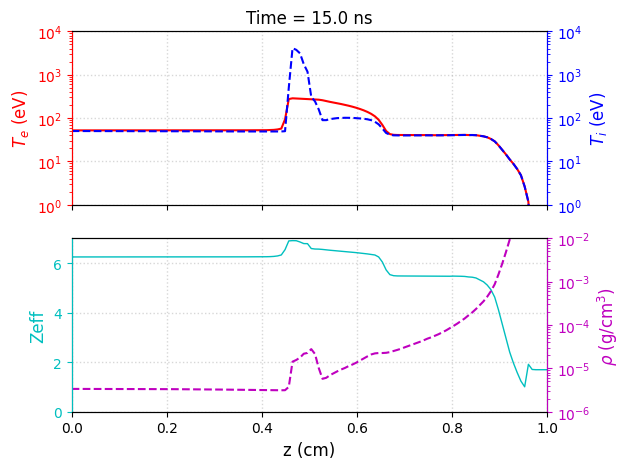

In [118]:
fig, axs = plt.subplots(2, 1, sharex=True)

xx = np.linspace(0,1,128)

axs[0].semilogy(xx, data_dict['tele'][0,:]/11600, '-r', label='Te', lw=1.5)
# axs[0].semilogy(xx, data_dict['tion'][0,:]/11600, '--b', label='Ti', lw=1.5)
axs[0].set_ylabel(r'$T_e$ (eV)', color='r', fontsize=12)
axs[0].tick_params(axis='y',which='both', color='r', labelcolor='r')
axs[0].spines['right'].set_color('b')
axs[0].spines['left'].set_color('r')
axs[0].grid(which='major', alpha=0.5,linestyle=':', lw=1.0)
axs[0].set_ylim([1e0, 1e4])
# axs[0].invert_xaxis()

ax2 = axs[0].twinx()
ax2.semilogy(xx, data_dict['tion'][0,:]/11600, '--b', label='Ti', lw=1.5)
ax2.set_ylabel(r'$T_i$ (eV)', color='b', fontsize=12)
ax2.tick_params(axis='y',which='both', color='b', labelcolor='b')
ax2.set_ylim([1e0, 1e4])
ax2.set_xlim([0,1])
ax2.set_xlabel('z (cm)', fontsize=12)
ax2.spines['right'].set_color('b')
ax2.spines['left'].set_color('r')
# ax2.set_xticks([0,1])

# fig.legend(['Te','Ti', r'$\rho$'], 
#            bbox_to_anchor=(0.87, 0.84),
#            fontsize=12, 
#            fancybox=False, 
#            frameon=False)
axs[0].set_title('Time = {:.1f} ns'.format(time_now))

axs[1].plot(xx, data_dict['ye'][0,:]*14, '-c', lw=1.0)
axs[1].set_ylabel(r'Zeff', color='c', fontsize=12)
axs[1].tick_params(axis='y', which='both', color='c', labelcolor='c')
axs[1].set_ylim([0,7])
# axs[1].set_xlim([0.4,1.2])
axs[1].set_xlabel('z (cm)', fontsize=12)
axs[1].grid(which='both', alpha=0.5,linestyle=':', lw=1.0)

ax3 = axs[1].twinx()
ax3.semilogy(xx, data_dict['dens'][0,:], '--m', lw=1.5)
ax3.tick_params(axis='y', which='both', color='m', labelcolor='m')
ax3.set_ylabel(r'$\rho$ (g/cm$^3$)', color='m', fontsize=12)
ax3.spines['right'].set_color('m')
ax3.spines['left'].set_color('c')
ax3.set_ylim([1e-6, 1e-2])

fig.tight_layout()

In [119]:
fig.savefig('/Users/yao/Desktop/lineouts.pdf',dpi=300)

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_61388/1070333793.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd


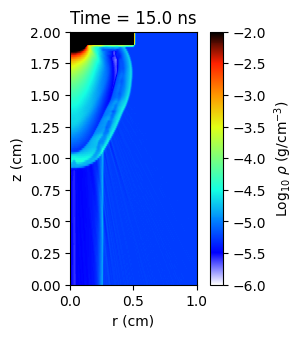

In [120]:
import matplotlib as mpl

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)



jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

width  = 3.487 * 1.0
height = width #/ 1.618 * 0.8

# fig = plt.figure(figsize=(width, height))

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

f1 = ax.imshow(np.log10(data_dict['dens'][:,:,0].T),
           # cmap='magma_r',
               cmap=newcmap,
           origin='lower',
           extent=[0,1,0,2],
           vmin=-6,
           vmax=-2,
           aspect='equal',
          )

ax.set_xlim(0,1)
ax.set_ylim(0,2)
ax.set_xlabel('r (cm)')
ax.set_ylabel('z (cm)')
ax.set_title('Time = {:.1f} ns'.format(time_now))

cbar = fig.colorbar(f1)
cbar.ax.set_ylabel(r'Log$_{10}$ $\rho$ (g/cm$^{-3}$)')
# cbar.minorticks_on()
cbar.cmap.set_under('white')
cbar.cmap.set_over('black')
# cbar

# Colorbar
# grid[1].cax.colorbar(im1)
# grid[1].cax.cla()
# mpl.colorbar.Colorbar(grid[1].cax,im1)
# grid[1].cax.toggle_label(True)
# grid[1].cax.tick_params(size=0)
# grid[1].cax.toggle_label(True)
# fig.tight_layout()

fig.set_size_inches(width, height)
fig.tight_layout()
plt.show()

In [121]:
fig.savefig('/Users/yao/Desktop/map.pdf',dpi=300)

In [6]:
pressure_in_bar = 1e-3 # 10 mbar
kb = 1.4e-23           # J/K
T0 = 300               # K
pressure_in_Pa  = pressure_in_bar * 1e5
number_density  = pressure_in_Pa / (kb * T0)  # m^-3

In [7]:
number_density/1e6

2.3809523809523812e+16

In [11]:
rho = number_density * mp * 4 # kg/m^3
rho*1e-3 # g/cm^3

1.5912000000000004e-07

In [12]:
rho = number_density * mp * 1 # kg/m^3
rho*1e-3 # g/cm^3

3.978000000000001e-08